In [1]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
   INFO  NumExpr defaulting to 4 threads.
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'y1': array([-20.,   2.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y2': array([0., 2.]), 'g': array([-1.,  1.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.epileptor.Epileptor2D.tt = NArray(label='tt', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor2D.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'z': array([2., 5.])}, required=True)
WARNING 

WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetFitzHughNagumo.state_variable_range = Final(field_type=<class 'dict'>, default={'xi': array([-4.,  4.]), 'eta': array([-3.,  3.]), 'alpha': array([-4.,  4.]), 'beta': array([-3.,  3.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 3.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.b = NArray(label=':math:`b`', dtype=float64, default=array([3.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindma

Region-level simulation of BOLD data, with stimulus.

In [2]:
conn = connectivity.Connectivity.from_file()

# configure stimulus spatial pattern
weighting = numpy.zeros((76, ))
weighting[[0, 7, 13, 33, 42]] = numpy.array([2.0 ** -2, 2.0 ** -3, 2.0 ** -4, 2.0 ** -5, 2.0 ** -6])

# temporal profile
eqn_t = equations.Gaussian()
eqn_t.parameters["midpoint"] = 25000.0
eqn_t.parameters["sigma"] = 2000.0

stimulus = patterns.StimuliRegion(temporal=eqn_t,
                                  connectivity=conn,
                                  weight=weighting)

sim = simulator.Simulator(
    model=models.Generic2dOscillator(a=numpy.array([0.5])),
    connectivity=conn,
    coupling=coupling.Linear(a=numpy.array([0.0126])),
    integrator=integrators.HeunDeterministic(dt=0.5),
    monitors=(
        monitors.TemporalAverage(period=1.0),
        monitors.Bold(period=500),
        monitors.ProgressLogger(period=5e3),
        ),
    stimulus=stimulus,
    simulation_length=60e3, # 1 minute simulation
).configure()

(tavg_time, tavg_data), (bold_time, bold_data), _ = sim.run()

WARNING  File 'hemispheres' not found in ZIP.
   INFO  step 1 time 0.0005 s
   INFO  step 10001 time 5.0005 s
   INFO  step 20001 time 10.0005 s
   INFO  step 30001 time 15.0005 s
   INFO  step 40001 time 20.0005 s
   INFO  step 50001 time 25.0005 s
   INFO  step 60001 time 30.0005 s
   INFO  step 70001 time 35.0005 s
   INFO  step 80001 time 40.0005 s
   INFO  step 90001 time 45.0005 s
   INFO  step 100001 time 50.0005 s
   INFO  step 110001 time 55.0005 s


<IPython.core.display.Javascript object>


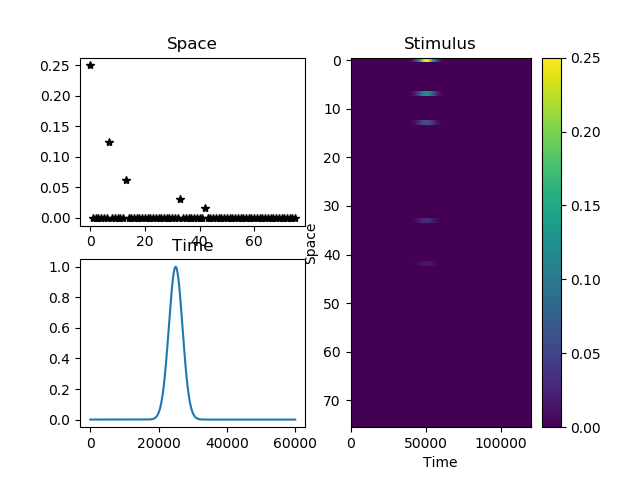

In [3]:
plot_pattern(sim.stimulus)

<IPython.core.display.Javascript object>


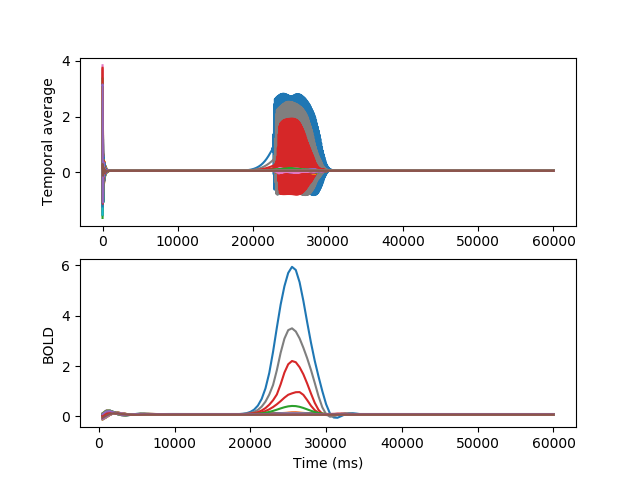

Text(0.5, 0, 'Time (ms)')

In [4]:
figure()

subplot(211)
plot(tavg_time, tavg_data[:, 0, :, 0])
ylabel("Temporal average")

subplot(212)
plot(bold_time, bold_data[:, 0, :, 0])
ylabel("BOLD")

xlabel('Time (ms)')